In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline 
#inlining plots in notebook

Для выполнения данной работы было выбрано бета-распределение ([ru](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5), [en](https://en.wikipedia.org/wiki/Beta_distribution)), которое входит в набор непрерывных распределений, доступных "из коробки" в [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta).
Функция плотности вероятности для данного распределения выглядит следующим образом:

$$ f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}, $$

где $\alpha$, $\beta$ - параметры, а 

$$ B(\alpha, \beta) = \int\limits_0^1 x^{\alpha-1}(1-x)^{\beta-1} dx $$

-бета-функция. Случайные величины $x$, с данным распределением, лежат в пределах $x \in [0, 1]$.

В дальнейшем будем использовать бета-распределение с параметрами $\alpha=0.2, \beta=0.2$

In [2]:
a = 0.2
b = 0.2
distr = sts.beta(a, b)

Создадим выборку из 1000 элементов и изобразими гистограмму плотности распределения полученных величин.
Поверх гистограммы изобразим теоретические значения функции вероятности бета-распределения.

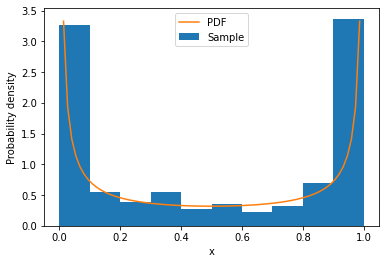

In [3]:
sample = distr.rvs(1000)
x = np.linspace(0, 1, 75)

plt.hist(sample, density=True, label="Sample")
plt.plot(x, distr.pdf(x), label="PDF")

plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()

Полученный график может вызвать сомнения, так как значения по оси $y$ больше 1. Но это совершенно нормально, так как значения по данной оси представляют собой не вероятность в данной точке, а значения функции плотности веростности. Сама же вероятность на промежутке $[a,b] \subseteq [0,1] $ равна

$$ \int\limits_a^b f(x)dx \le 1, $$

где $f(x)$ - та самая плотность вероятности.

Сгенерируем $1000$ выборок объемом $5,10$ и $50$ элементов. Для этого создадим соотвествующую функцию, которая принимает на вход количество элементов в выборке, количество выборок и распределение.

In [4]:
def generate_samples(n, count, distribution=distr):
    result = np.empty(shape=(count, n)) #create matrix without initialization value (https://numpy.org/doc/stable/reference/generated/numpy.empty.html)
    for i in range(count):
        result[i,:] = distribution.rvs(n)
    return result 

Теоретические значения мат. ожидания и стандартного отклонения можно как посчитать самостоятельно, по формулам:

$$ E[x] = \frac{\alpha}{\alpha+\beta} $$

$$ \sigma = \sqrt{D[x]}= \sqrt{\frac{\alpha \beta}{(\alpha + \beta)^2(\alpha+\beta+1)}}, $$

так и воспользовавшись функциями scipy. Убедимся, что значения, полученные двумя способами, равны между собой.

В дальнейшем будем использовать функции scipy.

In [5]:
print(distr.mean() == a / (a+b))
print(distr.std() == np.sqrt(a*b/(a+b)**2/(a+b+1)))

True
True


Согласно ЦПТ значения средних для произвольных выборок объема $n$ из одного распределения - нормально распределены:

$$\overline{x_n} \sim N(E[x], \dfrac{D[x]}{n}) $$

Убедимся в этом на примере наших выборок.

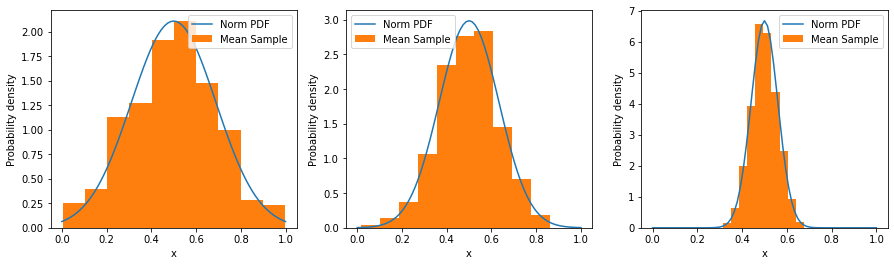

In [6]:
plot_number = 1

plt.figure(figsize=(15,4))

for n in [5,10,50]:
    plt.subplot(1,3, plot_number)
    plot_number += 1
    
    samples = generate_samples(n, 1000) #generate samples
    norm_distr = sts.norm(distr.mean(), distr.std()/np.sqrt(n)) #create the normal distribution predicted by the central limit theorem
    plt.plot(x, norm_distr.pdf(x), label="Norm PDF")
    plt.hist(samples.mean(axis=1), density=True, label="Mean Sample");
    
    plt.xlabel("x")
    plt.ylabel("Probability density")
    plt.legend()

Видно, что чем больше был объем исходных выборок, тем точнее выборка из средних апроксимируется нормальным распределением(что стоило ожидать:))